# KALIAN BISA PAKAI df ya untuk datasetnya. Sudah ter-cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_tiktok.csv')
df

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K
1,2,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K
2,3,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K
3,4,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K
4,5,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K
...,...,...,...,...,...,...,...,...
995,996,brendadialoy,Brenda Dialoy,371.9K,1.2M,187.5K,626,2K
996,997,jujufitcats,Juju Fitcats,4.3M,2.2M,280.8K,380,558
997,998,xoteam,XO Team,37.8M,2.5M,180.2K,859,450
998,999,kimsnwuo,️️,100.9K,957.4K,226.8K,908,1.7K


In [3]:
df.isna().sum() #cek Berapa banyak data tiap kolom yang null

S.no             0
Tiktoker name    0
Tiktok name      1
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64

In [4]:
df = df.dropna(subset=["Tiktok name"], axis=0) #menghapus baris yang memiliki nilai null dimana nilai null itu berada pada kolom Tiktok Name

In [5]:
del df['S.no']

In [6]:
df.isna().any() #cek kembali Berapa banyak data tiap kolom yang null

Tiktoker name    False
Tiktok name      False
Subscribers      False
Views avg.       False
Likes avg.       False
Comments avg.    False
Shares avg.      False
dtype: bool

In [7]:
df.duplicated().any() #cek apakah ada data yang duplikat atau tidak

True

In [8]:
df.dtypes

Tiktoker name    object
Tiktok name      object
Subscribers      object
Views avg.       object
Likes avg.       object
Comments avg.    object
Shares avg.      object
dtype: object

In [9]:
df['Subscribers'] = (df['Subscribers'].replace(r'[KM]+$', '', regex=True).astype(float) * \
df['Subscribers'].str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6]).astype(int))

df['Views avg.'] = (df['Views avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
df['Views avg.'].str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6]).astype(int))

df['Likes avg.'] = (df['Likes avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
df['Likes avg.'].str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6]).astype(int))

df['Comments avg.'] = (df['Comments avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
df['Comments avg.'].str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6]).astype(int))

df['Shares avg.'] = (df['Shares avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
df['Shares avg.'].str.extract(r'[\d\.]+([KM]+)', expand=False)
.fillna(1)
.replace(['K','M'], [10**3, 10**6]).astype(int))


C:\Users\angela\AppData\Local\Temp\ipykernel_17620\2182130126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subscribers'] = (df['Subscribers'].replace(r'[KM]+$', '', regex=True).astype(float) * \
C:\Users\angela\AppData\Local\Temp\ipykernel_17620\2182130126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Views avg.'] = (df['Views avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
C:\Users\angela\AppData\Local\Temp\ipykernel_17620\2182130126.py:11: SettingWithCopyWarning: 
A value 

In [10]:
df.dtypes

Tiktoker name     object
Tiktok name       object
Subscribers      float64
Views avg.       float64
Likes avg.       float64
Comments avg.    float64
Shares avg.      float64
dtype: object

In [11]:
df

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,jypestraykids,Stray Kids,13800000.0,6400000.0,2300000.0,50200.0,34200.0
1,khaby.lame,Khabane lame,149200000.0,17300000.0,2300000.0,15200.0,8700.0
2,scarlettsspam2,scarlett,2100000.0,17900000.0,845800.0,53900.0,6300.0
3,addisonre,Addison Rae,88700000.0,22000000.0,906600.0,7600.0,26200.0
4,belindatok,Belinda,4800000.0,14200000.0,1500000.0,14500.0,15300.0
...,...,...,...,...,...,...,...
995,brendadialoy,Brenda Dialoy,371900.0,1200000.0,187500.0,626.0,2000.0
996,jujufitcats,Juju Fitcats,4300000.0,2200000.0,280800.0,380.0,558.0
997,xoteam,XO Team,37800000.0,2500000.0,180200.0,859.0,450.0
998,kimsnwuo,️️,100900.0,957400.0,226800.0,908.0,1700.0


## Mean, Median, Mode, Sum, Count

In [12]:
print(df['Subscribers'].mean())
print(df['Views avg.'].mean())
print(df['Likes avg.'].mean())
print(df['Comments avg.'].mean())
print(df['Shares avg.'].mean())

7090693.793793794
2856087.4874874875
352627.82782782783
2537.766766766767
3263.4464464464463


In [13]:
print(df['Subscribers'].median())
print(df['Views avg.'].median())
print(df['Likes avg.'].median())
print(df['Comments avg.'].median())
print(df['Shares avg.'].median())

3500000.0
2200000.0
274900.0
1600.0
1800.0


In [14]:
print(df['Subscribers'].mode())
print(df['Views avg.'].mode())
print(df['Likes avg.'].mode())
print(df['Comments avg.'].mode())
print(df['Shares avg.'].mode())

0    1100000.0
Name: Subscribers, dtype: float64
0    1600000.0
Name: Views avg., dtype: float64
0    1100000.0
Name: Likes avg., dtype: float64
0    1400.0
Name: Comments avg., dtype: float64
0    1300.0
Name: Shares avg., dtype: float64


In [15]:
print(df['Subscribers'].sum())
print(df['Views avg.'].sum())
print(df['Likes avg.'].sum())
print(df['Comments avg.'].sum())
print(df['Shares avg.'].sum())

7083603100.0
2853231400.0
352275200.0
2535229.0
3260183.0


In [16]:
print(df['Subscribers'].count())
print(df['Views avg.'].count())
print(df['Likes avg.'].count())
print(df['Comments avg.'].count())
print(df['Shares avg.'].count())

999
999
999
999
999


## std, var, IQR

In [17]:
print(df['Subscribers'].std())
print(df['Views avg.'].std())
print(df['Likes avg.'].std())
print(df['Comments avg.'].std())
print(df['Shares avg.'].std())

11609832.80580642
2216568.628674682
286269.1873073131
3692.961026187326
4780.954926047169


In [18]:
print(df['Subscribers'].var())
print(df['Views avg.'].var())
print(df['Likes avg.'].var())
print(df['Comments avg.'].var())
print(df['Shares avg.'].var())

134788217778779.0
4913176485624.761
81950047601.5895
13637961.140938548
22857530.00489469


In [19]:
np.percentile(df.Subscribers, [25, 50, 75])

array([1300000., 3500000., 8100000.])

In [20]:
Q1 = np.percentile(df.Subscribers,25)
Q3 = np.percentile(df.Subscribers,75)
IQR = Q3 - Q1
IQR

6800000.0

In [21]:
np.percentile(df['Views avg.'],[25, 50, 75])

array([1600000., 2200000., 3350000.])

In [22]:
Q1 = np.percentile(df['Views avg.'],25)
Q3 = np.percentile(df['Views avg.'],75)
IQR = Q3 - Q1
IQR

1750000.0

In [23]:
np.percentile(df['Likes avg.'],[25, 50, 75])

array([190000., 274900., 400750.])

In [24]:
Q1 = np.percentile(df['Likes avg.'],25)
Q3 = np.percentile(df['Likes avg.'],75)
IQR = Q3 - Q1
IQR

210750.0

In [25]:
np.percentile(df['Comments avg.'],[25, 50, 75])

array([ 984., 1600., 2700.])

In [26]:
Q1 = np.percentile(df['Comments avg.'],25)
Q3 = np.percentile(df['Comments avg.'],75)
IQR = Q3 - Q1
IQR

1716.0

In [27]:
np.percentile(df['Shares avg.'],[25, 50, 75])

array([ 822., 1800., 3750.])

In [28]:
Q1 = np.percentile(df['Shares avg.'],25)
Q3 = np.percentile(df['Shares avg.'],75)
IQR = Q3 - Q1
IQR

2928.0

## Data Visualization

In [29]:
subs = df.sort_values(by = ["Subscribers"], ascending = False)
subs

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
1,khaby.lame,Khabane lame,149200000.0,17300000.0,2300000.0,15200.0,8700.0
10,charlidamelio,charli d’amelio,146200000.0,15200000.0,959400.0,20800.0,4600.0
74,bellapoarch,Bella Poarch,91400000.0,7400000.0,677300.0,4900.0,1100.0
3,addisonre,Addison Rae,88700000.0,22000000.0,906600.0,7600.0,26200.0
19,kimberly.loaiza,Kimberly Loaiza,67200000.0,8800000.0,1200000.0,12100.0,4300.0
...,...,...,...,...,...,...,...
206,iamprisleeciyi,Priscilla ◡̈,13900.0,2300000.0,522900.0,1200.0,4200.0
307,meganfitton6,user3892932795857,8700.0,2000000.0,315300.0,1600.0,4400.0
190,wilmah10,wilmah10,6300.0,2900000.0,208200.0,2700.0,9900.0
244,straange_56guuuuy,aikihoruus?,5900.0,1500000.0,276600.0,2200.0,10800.0


In [30]:
df1 = subs.iloc[0:9]
df1

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
1,khaby.lame,Khabane lame,149200000.0,17300000.0,2300000.0,15200.0,8700.0
10,charlidamelio,charli d’amelio,146200000.0,15200000.0,959400.0,20800.0,4600.0
74,bellapoarch,Bella Poarch,91400000.0,7400000.0,677300.0,4900.0,1100.0
3,addisonre,Addison Rae,88700000.0,22000000.0,906600.0,7600.0,26200.0
19,kimberly.loaiza,Kimberly Loaiza,67200000.0,8800000.0,1200000.0,12100.0,4300.0
326,cznburak,cznburak,63600000.0,4600000.0,228400.0,2300.0,978.0
16,domelipa,domelipa,58100000.0,10400000.0,1500000.0,9100.0,3500.0
630,dixiedamelio,dixie,57400000.0,2400000.0,220500.0,1900.0,424.0
6,therock,The Rock,55400000.0,13100000.0,1500000.0,14300.0,11900.0


#### Line Chart

In [31]:
user = df1['Tiktoker name']
sub = df1['Subscribers']
view = df1['Views avg.']
like = df1['Likes avg.']
comment = df1['Comments avg.']
share = df1['Shares avg.']

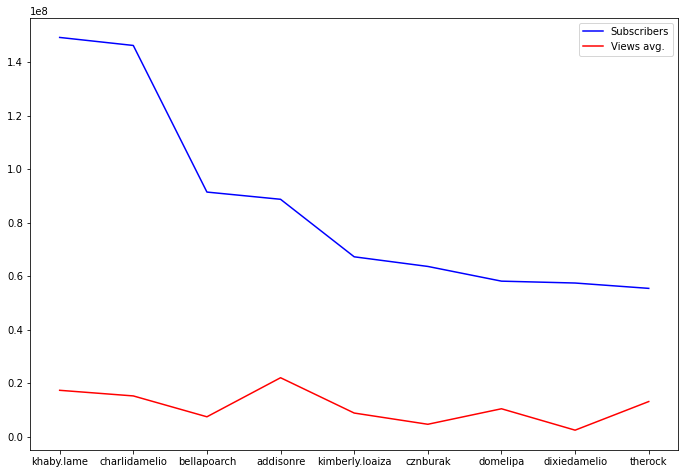

In [32]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.5,1.5])
myaxes.plot(user, sub, 'b', label = 'Subscribers')
myaxes.plot(user, view, 'r', label = 'Views avg.')
myaxes.legend()

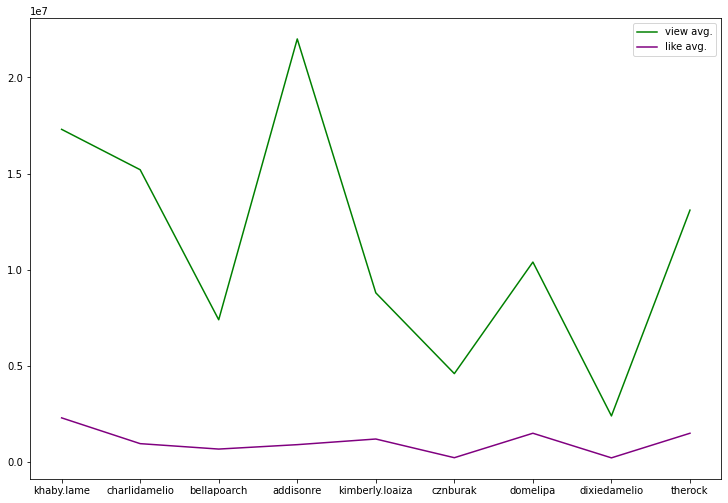

In [33]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(user, view, 'green', label = 'view avg.')
myaxes.plot(user, like, 'purple', label = 'like avg.')
myaxes.legend()

#### Bar Chart

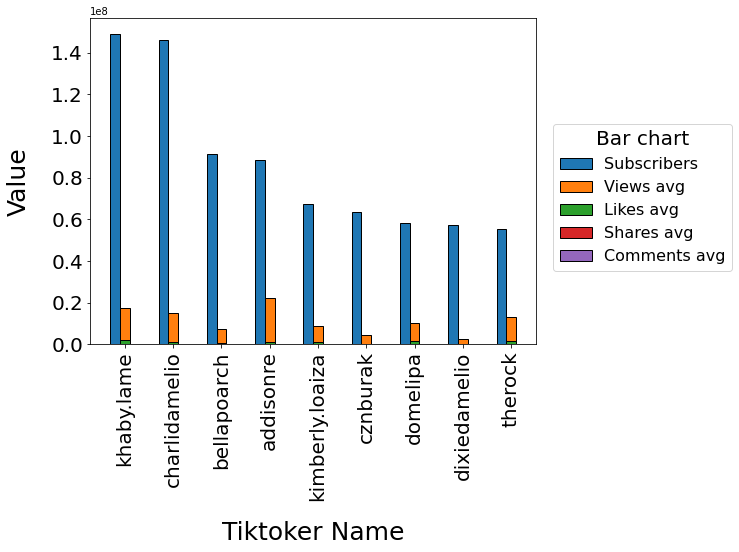

In [34]:
#create the base axis
fig, ax = plt.subplots(1,1, figsize = (8,6))

#set the labels
#and the x positions
label = df1["Tiktoker name"]
x = np.arange(len(label))

#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              df1["Subscribers"],
              width = width, 
               label = 'Subscribers',
               edgecolor = "black")
#create the second bar using x
rect2 = ax.bar(x,
              df1["Views avg."],
              width = width,
              label = 'Views avg',
              edgecolor = "black")
#create the third bar plus 1 width
rect3 = ax.bar(x,
              df1["Likes avg."],
              width = width,
              label = 'Likes avg',
              edgecolor = "black")
rect4 = ax.bar(x,
              df1["Shares avg."],
              width = width,
              label = 'Shares avg',
              edgecolor = "black")
rect5 = ax.bar(x,
              df1["Comments avg."],
              width = width,
              label = 'Comments avg',
              edgecolor = "black")

#add the labels to the axis
ax.set_ylabel("Value",
             fontsize = 25,
             labelpad = 20)
ax.set_xlabel("Tiktoker Name",
             fontsize = 25,
             labelpad =20)

#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "Bar chart",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90,
              labelsize = 20)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 20)

#### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08931fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a089415b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08931d00>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08941b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08941e20>],
 'means': []}

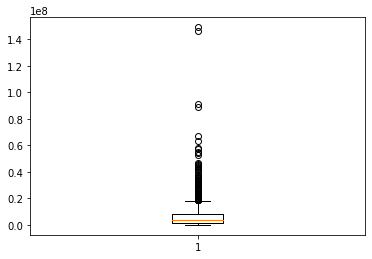

In [35]:
plt.boxplot(df['Subscribers'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08b438b0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08b43e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08b435e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08b51430>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08b51700>],
 'means': []}

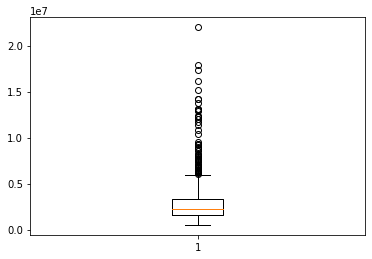

In [36]:
plt.boxplot(df['Views avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08ba8340>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08ba88e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08ba8070>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08ba8e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08bb7190>],
 'means': []}

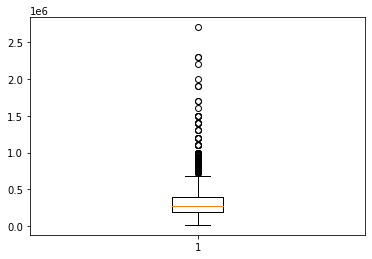

In [37]:
plt.boxplot(df['Likes avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08c0c400>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08c0c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08c0c130>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08c0cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08c16280>],
 'means': []}

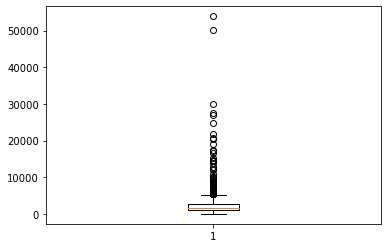

In [38]:
plt.boxplot(df['Comments avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08c564c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08c56a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08c561f0>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08c62040>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08c62310>],
 'means': []}

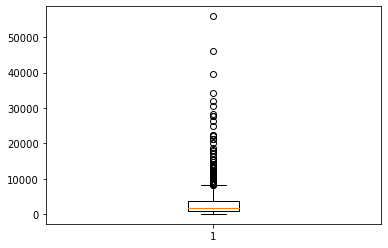

In [39]:
plt.boxplot(df['Shares avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08cb5520>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08cb5ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08cb5220>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08cc10a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08cc1370>],
 'means': []}

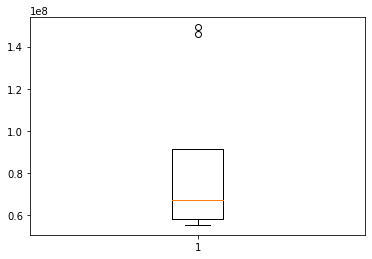

In [40]:
plt.boxplot(df1['Subscribers'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08d0af70>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08d18550>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08d0ac70>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08d18af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08d18dc0>],
 'means': []}

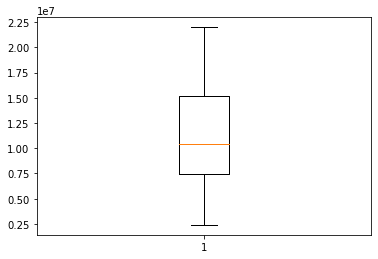

In [41]:
plt.boxplot(df1['Views avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08d81280>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08d817c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08d74f70>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08d81d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08d900a0>],
 'means': []}

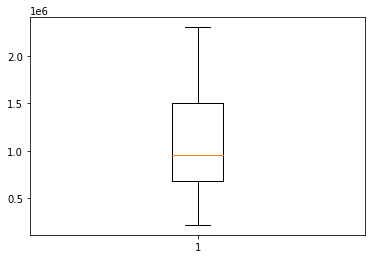

In [42]:
plt.boxplot(df1['Likes avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08ddf5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08ddfb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08ddf340>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08dec130>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08dec400>],
 'means': []}

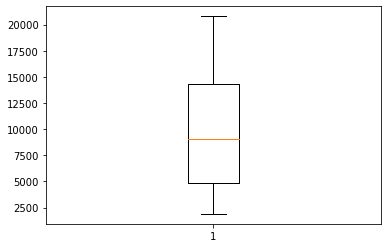

In [43]:
plt.boxplot(df1['Comments avg.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a08e494c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a08e49a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a08e491c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29a08e56040>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a08e56310>],
 'means': []}

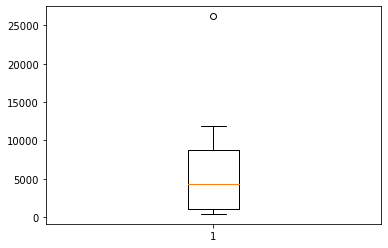

In [44]:
plt.boxplot(df1['Shares avg.'])

#### Pie Chart

([<matplotlib.patches.Wedge at 0x29a08eac070>,
 [Text(0.905942345165159, 0.6239138299770666, 'khaby.lame'),
  Text(-0.2468781305809481, 1.0719380526135158, 'charlidamelio'),
  Text(-1.019887453168017, 0.4121038496185832, 'bellapoarch'),
  Text(-1.0355579475276704, -0.3709713429798573, 'addisonre'),
  Text(-0.6180415740436799, -0.9099585774932895, 'kimberly.loaiza'),
  Text(-0.07464227645294808, -1.0974645919417727, 'cznburak'),
  Text(0.45257668484468067, -1.0025838340682531, 'domelipa'),
  Text(0.8554013215882352, -0.6915841084243485, 'dixiedamelio'),
  Text(1.0725336776521526, -0.24427752721433188, 'therock')],
 [Text(0.49415037009008667, 0.34031663453294536, '19.2%'),
  Text(-0.13466079849869894, 0.5846934832437358, '18.8%'),
  Text(-0.5563022471825547, 0.22478391797377265, '11.8%'),
  Text(-0.5648497895605474, -0.20234800526174032, '11.4%'),
  Text(-0.3371135858420072, -0.49634104226906695, '8.6%'),
  Text(-0.04071396897433531, -0.5986170501500578, '8.2%'),
  Text(0.246860009915280

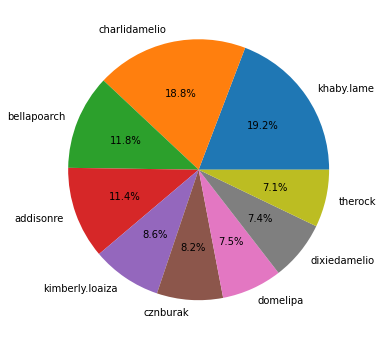

In [45]:
plt.figure(figsize=(6,6))
plt.pie(df1["Subscribers"],autopct='%1.1f%%', labels = df1["Tiktoker name"])

([<matplotlib.patches.Wedge at 0x29a09ef1700>,
 [Text(0.9451433085958647, 0.5627647165703109, 'khaby.lame'),
  Text(0.027315447937037805, 1.0996607960202998, 'charlidamelio'),
  Text(-0.6888855837475546, 0.8575760330750803, 'bellapoarch'),
  Text(-1.0998091958686218, -0.02048737862235869, 'addisonre'),
  Text(-0.6175007655664136, -0.910325658500788, 'kimberly.loaiza'),
  Text(-0.19698863062962313, -1.0822178520994126, 'cznburak'),
  Text(0.30990572269135536, -1.0554422973536493, 'domelipa'),
  Text(0.6941966597369594, -0.853282484063776, 'dixiedamelio'),
  Text(1.0102879767603803, -0.43510711786112793, 'therock')],
 [Text(0.5155327137795624, 0.306962572674715, '17.1%'),
  Text(0.014899335238384255, 0.5998149796474361, '15.0%'),
  Text(-0.37575577295321155, 0.4677687453136801, '7.3%'),
  Text(-0.5998959250192482, -0.011174933794013828, '21.7%'),
  Text(-0.3368185993998619, -0.49654126827315703, '8.7%'),
  Text(-0.10744834397979443, -0.5903006465996795, '4.5%'),
  Text(0.1690394851043756

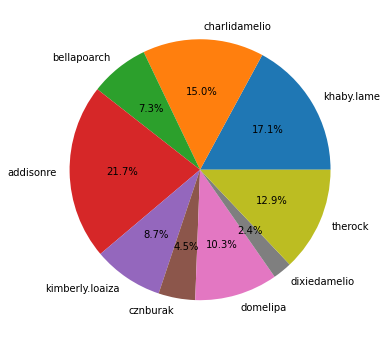

In [46]:
plt.figure(figsize=(6,6))
plt.pie(df1["Views avg."],autopct='%1.1f%%', labels = df1["Tiktoker name"])

([<matplotlib.patches.Wedge at 0x29a09f67c10>,
 [Text(0.7963936414402893, 0.7587866418654694, 'khaby.lame'),
  Text(-0.2925292208673315, 1.060389859881144, 'charlidamelio'),
  Text(-0.7973723906182891, 0.7577580555029916, 'bellapoarch'),
  Text(-1.0695826885629516, 0.25689077898291424, 'addisonre'),
  Text(-0.9849248112686957, -0.48981947301768686, 'kimberly.loaiza'),
  Text(-0.6538638674508563, -0.8845688457334506, 'cznburak'),
  Text(-0.07090649316786257, -1.0977122889111863, 'domelipa'),
  Text(0.5321124588823611, -0.9627337799735541, 'dixiedamelio'),
  Text(0.9672076890423269, -0.5239363379814399, 'therock')],
 [Text(0.4343965316947032, 0.4138836228357105, '24.2%'),
  Text(-0.1595613932003626, 0.5783944690260785, '10.1%'),
  Text(-0.43493039488270313, 0.41332257572890446, '7.1%'),
  Text(-0.5834087392161553, 0.14012224308158955, '9.6%'),
  Text(-0.5372317152374703, -0.26717425800964734, '12.6%'),
  Text(-0.356653018609558, -0.4824920976727912, '2.4%'),
  Text(-0.038676269000652304,

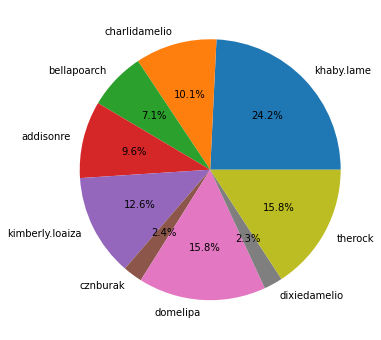

In [47]:
plt.figure(figsize=(6,6))
plt.pie(df1["Likes avg."],autopct='%1.1f%%', labels = df1["Tiktoker name"])

([<matplotlib.patches.Wedge at 0x29a09fe7190>,
 [Text(0.9426821853245203, 0.5668776741694691, 'khaby.lame'),
  Text(-0.27522831262755115, 1.065011444036256, 'charlidamelio'),
  Text(-1.0120954834294509, 0.4308859854087927, 'bellapoarch'),
  Text(-1.0989953347500603, -0.047002704152030256, 'addisonre'),
  Text(-0.809016924188579, -0.7453130995604809, 'kimberly.loaiza'),
  Text(-0.3391733509322475, -1.0464040510325783, 'cznburak'),
  Text(0.10172468144845445, -1.0952863046638586, 'domelipa'),
  Text(0.5122626547036964, -0.9734407904931464, 'dixiedamelio'),
  Text(0.9603671597607535, -0.5363719963356248, 'therock')],
 [Text(0.5141902829042838, 0.30920600409243765, '17.2%'),
  Text(-0.1501245341604824, 0.580915333110685, '23.6%'),
  Text(-0.5520520818706095, 0.23502871931388689, '5.6%'),
  Text(-0.5994520007727601, -0.025637838628380136, '8.6%'),
  Text(-0.44128195864831576, -0.4065344179420804, '13.7%'),
  Text(-0.18500364596304408, -0.5707658460177699, '2.6%'),
  Text(0.05548618988097515

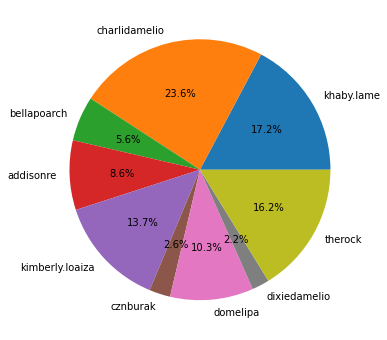

In [48]:
plt.figure(figsize=(6,6))
plt.pie(df1["Comments avg."],autopct='%1.1f%%', labels = df1["Tiktoker name"])

([<matplotlib.patches.Wedge at 0x29a0a05c640>,
 [Text(0.9938330376298969, 0.47148265431013686, 'khaby.lame'),
  Text(0.479109532568618, 0.9901787999153893, 'charlidamelio'),
  Text(0.17572239418987684, 1.0858736759771725, 'bellapoarch'),
  Text(-1.0365758752090106, 0.36811744720221257, 'addisonre'),
  Text(-0.3865826477206165, -1.0298319554574513, 'kimberly.loaiza'),
  Text(-0.09927729211694122, -1.0955108485405007, 'cznburak'),
  Text(0.1509099175809209, -1.0895990991074285, 'domelipa'),
  Text(0.3641565291421076, -1.0379739988473573, 'dixiedamelio'),
  Text(0.904191847303803, -0.6264480052401289, 'therock')],
 [Text(0.5420907477981255, 0.25717235689643825, '14.1%'),
  Text(0.2613324723101553, 0.5400975272265759, '7.5%'),
  Text(0.09584857864902371, 0.592294732351185, '1.8%'),
  Text(-0.5654050228412785, 0.20079133483757047, '42.5%'),
  Text(-0.21086326239306352, -0.5617265211586097, '7.0%'),
  Text(-0.0541512502456043, -0.5975513719311821, '1.6%'),
  Text(0.08231450049868412, -0.5943

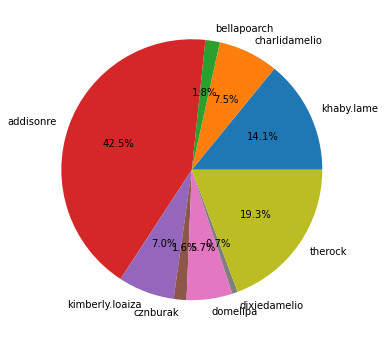

In [49]:
plt.figure(figsize=(6,6))
plt.pie(df1["Shares avg."],autopct='%1.1f%%', labels = df1["Tiktoker name"])

#### Scatter Plot

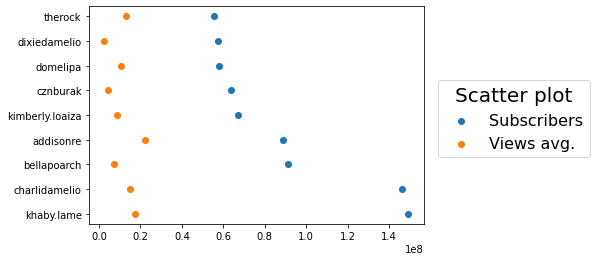

In [50]:
plt.scatter(x=df1['Subscribers'], y=df1['Tiktoker name'], label = 'Subscribers')
plt.scatter(x=df1['Views avg.'], y=df1['Tiktoker name'], label = 'Views avg.')
plt.legend(title = "Scatter plot",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))

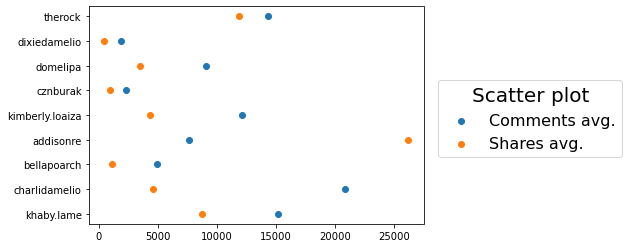

In [51]:
plt.scatter(x=df1['Comments avg.'], y=df1['Tiktoker name'], label = 'Comments avg.')
plt.scatter(x=df1['Shares avg.'], y=df1['Tiktoker name'], label = 'Shares avg.')
plt.legend(title = "Scatter plot",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))

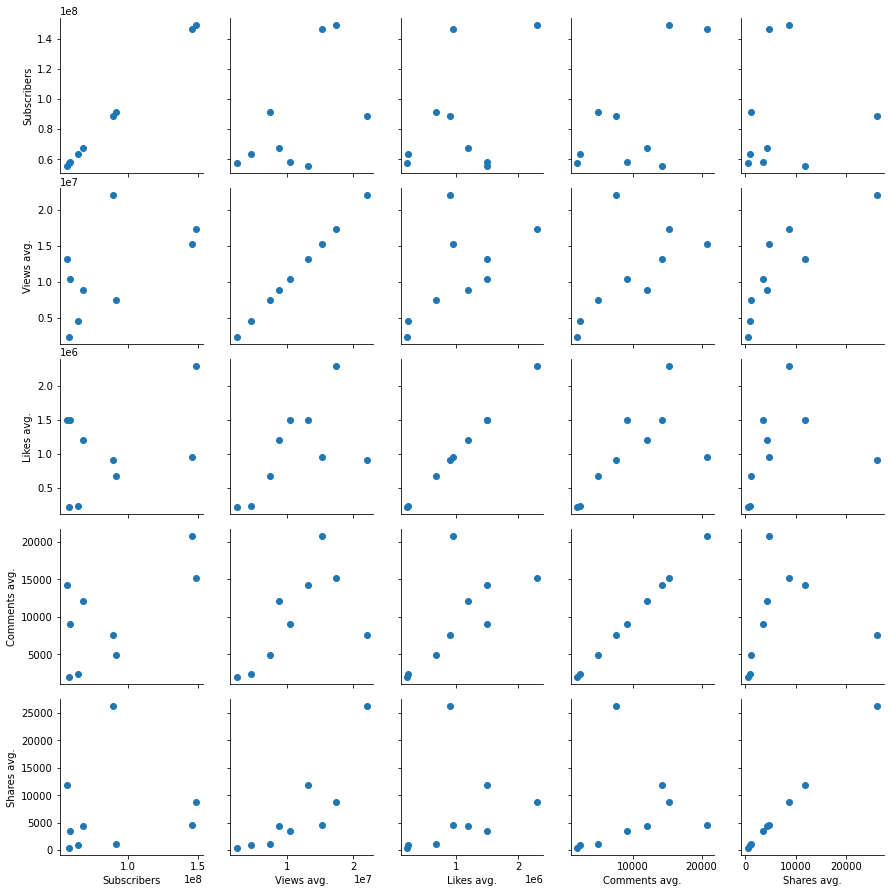

In [52]:
g = sns.PairGrid(df1)
g.map(plt.scatter)

#### Distplot

C:\Users\angela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Subscribers', ylabel='Density'>

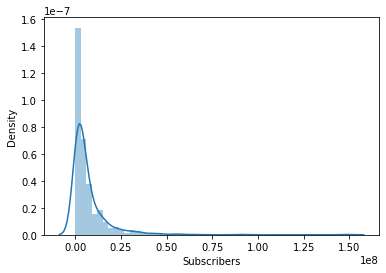

In [53]:
sns.distplot(df['Subscribers'], bins=50)

C:\Users\angela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views avg.', ylabel='Density'>

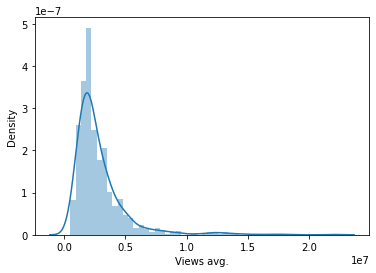

In [54]:
sns.distplot(df['Views avg.'],bins = 50)

C:\Users\angela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Likes avg.', ylabel='Density'>

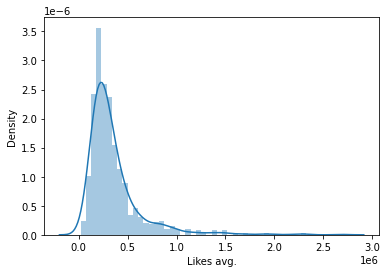

In [55]:
sns.distplot(df['Likes avg.'],bins = 50)

C:\Users\angela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shares avg.', ylabel='Density'>

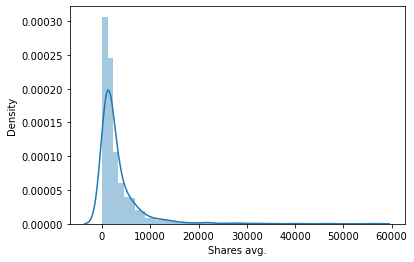

In [56]:
sns.distplot(df['Shares avg.'],bins = 50)

C:\Users\angela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Comments avg.', ylabel='Density'>

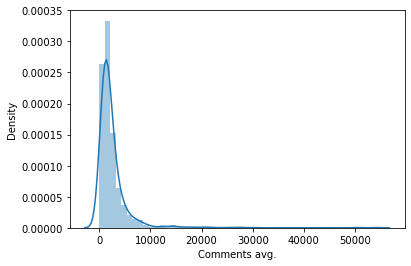

In [57]:
sns.distplot(df['Comments avg.'],bins = 50)

#### Heatmap

<AxesSubplot:>

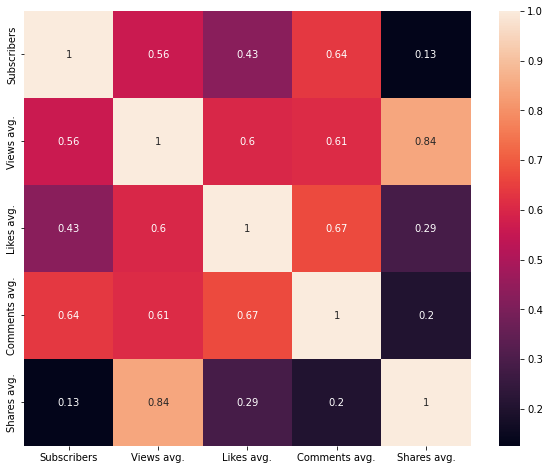

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot = True)

## Covarian dan Correlation

In [59]:
df1.cov()

,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
Subscribers,1.380190e+15,1.304547e+14,1.051421e+13,1.504512e+11,3.810474e+10
Views avg.,1.304547e+14,3.941028e+13,2.498178e+12,2.430125e+10,4.335146e+10
Likes avg.,1.051421e+13,2.498178e+12,4.400720e+11,2.833145e+09,1.552705e+09
Comments avg.,1.504512e+11,2.430125e+10,2.833145e+09,4.046250e+07,1.060692e+07
Shares avg.,3.810474e+10,4.335146e+10,1.552705e+09,1.060692e+07,6.687138e+07


In [60]:
df1.corr()

,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
Subscribers,1.000000,0.559352,0.426624,0.636649,0.125427
Views avg.,0.559352,1.000000,0.599869,0.608552,0.844460
Likes avg.,0.426624,0.599869,1.000000,0.671399,0.286225
Comments avg.,0.636649,0.608552,0.671399,1.000000,0.203912
Shares avg.,0.125427,0.844460,0.286225,0.203912,1.000000


## Uji T

In [104]:
subs = df.sort_values(by = ["Comments avg."], ascending = False)
subs

,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
2,2100000.0,17900000.0,845800.0,53900.0,6300.0
0,13800000.0,6400000.0,2300000.0,50200.0,34200.0
26,1300000.0,4900000.0,685900.0,30100.0,3300.0
21,18100000.0,3800000.0,1100000.0,27400.0,9500.0
113,733400.0,1600000.0,350900.0,27000.0,2500.0
...,...,...,...,...,...
633,310600.0,1900000.0,48800.0,208.0,12900.0
561,720300.0,1600000.0,143500.0,188.0,6300.0
749,1400000.0,1300000.0,94400.0,96.0,7700.0
78,7300000.0,7000000.0,1300000.0,26.0,2900.0


In [105]:
df2 = subs.iloc[0:25]
df3 = df2.iloc[0:10]
df4 = df2.iloc[11:21]

In [106]:
df3['Comments avg.'].mean()

29560.0

In [118]:
df3['Comments avg.'].var()

153482666.66666666

In [107]:
df4['Comments avg.'].mean()

14620.0

In [119]:
df4['Comments avg.'].var()

2066222.2222222222

In [108]:
df2['Comments avg.'].mean()

20184.0

### Hipotesis 1

In [117]:
# H0 = rata df3 <= rata df4
# H1 = rata df3 > rata df4

tval, pval = stats.ttest_ind(df3['Comments avg.'],df4['Comments avg.'])

print("Pvalue:", str(pval))
print("Tvalue:", str(tval))

if pval/2 <0.05:
    print("Tolak H0")
else:
    print("gagal tolak H0")

Pvalue: 0.0013467431451231312
Tvalue: 3.7880625433317237
Tolak H0


### Hipotesis 2

In [113]:
# Uji beda varians
group1 = df3['Comments avg.']
group2 = df4['Comments avg.']
  
# converting the list to array
x = np.array(group1)
y = np.array(group2)
  
def t_test(group1, group2):
    t = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.t.cdf(t, nun, dun)
    return t, p_value
  
# perform T-test
t,pvalue=t_test(x, y)

print("Pvalue:", str(pvalue))
print("Tvalue:", str(t))

if pvalue <0.05:
    print("Tolak H0")
else:
    print("gagal tolak H0")

Pvalue: 1.1712852909795402e-13
Tvalue: 74.2817810281781
Tolak H0


## uji F

### Hipotesis 1

In [85]:
import statsmodels.api as sm
import scipy.stats

In [86]:
dataframe = df.sort_values('Subscribers')

In [87]:
dataframe1 = dataframe.iloc[0:5]
dataframe1['Shares avg.'].mean()

6480.0

In [88]:
dataframe2 = dataframe.iloc[42:47]
dataframe2['Shares avg.'].mean()

7845.8

In [89]:
dataframe3 = dataframe.iloc[66:71]
dataframe3['Shares avg.'].mean()

2160.0

In [90]:
dataframe4 = dataframe.iloc[84:89]
dataframe4['Shares avg.'].mean()

4499.0

In [91]:
fvalue ,p = scipy.stats.f_oneway(dataframe1['Shares avg.'],
                                 dataframe2['Shares avg.'],
                                 dataframe3['Shares avg.'],
                                 dataframe4['Shares avg.'])

print("Pvalue:", str(p))
print("Fvalue:", str(fvalue))

if p <0.05:
    print("Tolak H0")
else:
    print("gagal tolak H0")
    
    
# H0 : μ1 = μ2 = μ3 = … = μk (Ini menyiratkan bahwa rata-rata semua populasi adalah sama)
# H1 : Ini menyatakan bahwa akan ada setidaknya satu rata-rata populasi yang berbeda dari yang lain

Pvalue: 0.5747466558947758
Fvalue: 0.6839460423974559
gagal tolak H0


### Hipotesis 2

In [98]:
dfhead = df.head()

In [99]:
dftail = df.tail()

In [102]:
# Create data
group1 = dfhead['Subscribers']
group2 = dftail['Subscribers']
  
# converting the list to array
x = np.array(group1)
y = np.array(group2)
  
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  
# perform F-test
fval,p = f_test(x, y)

print("Pvalue:", str(p))
print("Zvalue:", str(fval))

if p < 0.05:
    print("tolak H0")
else:
    print("gagal tolak H0")

Pvalue: 0.010382459250767195
Zvalue: 15.654810093687447
tolak H0


## UJI Z

In [67]:
subs = df.sort_values(by = ["Subscribers"], ascending = False)

In [68]:
df2 = subs.iloc[0:60]

In [69]:
df2['Views avg.'].mean()

5716666.666666667

### hipotesis 1

In [70]:
#Uji hipotesis 1 sampel
#H0 = rata views = 5700000
#H1 = rata views != 5700000

import pandas as pd
from statsmodels.stats import weightstats as stests
import scipy.stats as stats

ztest ,p = stests.ztest(df2['Views avg.'],value=5700000)
print("Pvalue:", str(p))
print("Zvalue:", str(ztest))

if p < 0.05:
    print("tolak H0")
else:
    print("gagal tolak H0")

Pvalue: 0.9759547039712174
Zvalue: 0.03014087251775373
gagal tolak H0


In [71]:
#banyak tiktoker yang memiliki views avg. nya kurang dari 6000000 ada 18 orang dari 60 orang
ztest ,p = stests.ztest(df2['Views avg.'],value=6000000)
cdfa = stats.norm(0,1).cdf(ztest)
cdfa * len(df2['Views avg.'])

18.251241198283378

In [72]:
#banyak tiktoker yang memiliki views avg. nya lebih dari 5000000 ada 5 orang dari 60 orang
ztest ,p = stests.ztest(df2['Views avg.'],value=5000000)
cdfa = stats.norm(0,1).cdf(ztest)
print(len(df2['Views avg.']) - (cdfa * len(df2['Views avg.'])))

5.8486700808645296


In [73]:
#ini kalau hitung zvalue secara manual
zval = ((5700000 - df2['Views avg.'].mean())/(df2['Views avg.'].std()/len(df2['Views avg.'])**(1/2))) * -1
zval

0.030140872517753724

### Hipotesis 2

In [74]:
df2 = subs.iloc[0:60]
df3 = df2.iloc[0:30]
df4 = df2.iloc[31:60]

In [75]:
df3['Views avg.'].mean()

7126666.666666667

In [76]:
df4['Views avg.'].mean()

4282758.620689655

In [77]:
### uji beda mean berpasangan
# d dianggap nol, karena itu valuenya tidak tertulis

tval, pval = stests.ztest(df3['Views avg.'],df4['Views avg.'])

if pval <0.05:
    print("Tolak H0")
else:
    print("gagal tolak H0")
    
print("Pvalue:", str(pval))
print("Tvalue:", str(tval))

Tolak H0
Pvalue: 0.007874277962319844
Tvalue: 2.6574135651446382
